In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Receitas_base.csv')

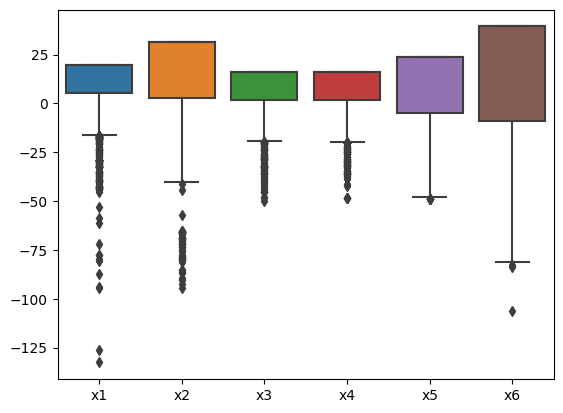

In [3]:
sns.boxplot(data)
def reindex_df(df, weight_col):
    """expand the dataframe to prepare for resampling
    result is 1 row per count per sample"""
    df = df.reindex(df.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

In [4]:
wc1 = 0.7952167414050823 
wc2 = 0.09715994020926756
wc3 = 0.10762331838565023

ws = 0.20478325859491778
wns = 0.7952167414050823


In [5]:
contrato_smoker = pd.concat([pd.concat([pd.Series(data.x2.values, name='contrato_smoker'), pd.Series(np.ones(data.shape[0])*wns, name='weight')], axis=1),
                            pd.concat([pd.Series(data.x3.values, name='contrato_smoker'), pd.Series(np.ones(data.shape[0])*ws, name='weight')], axis=1)], axis=0) 



In [6]:
contrato_cluster = pd.concat([pd.concat([pd.Series(data.x4.values, name='contrato_cluster'), pd.Series(np.ones(data.shape[0])*wc1, name='weight')], axis=1),
                               pd.concat([pd.Series(data.x5.values, name='contrato_cluster'), pd.Series(np.ones(data.shape[0])*wc2, name='weight')], axis=1),
                               pd.concat([pd.Series(data.x6.values, name='contrato_cluster'), pd.Series(np.ones(data.shape[0])*wc3, name='weight')], axis=1)], axis=0) 



In [7]:
contrato_cluster.weight.value_counts()

0.795217    3000
0.097160    3000
0.107623    3000
Name: weight, dtype: int64

[None, None, None]

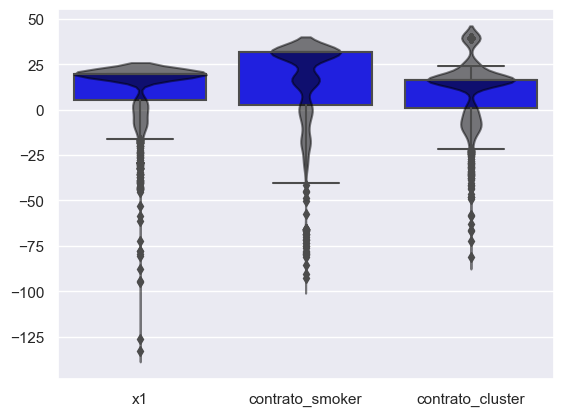

In [26]:
sns.set()
c2_sampled = contrato_smoker.sample(n=3000, weights=contrato_smoker.weight).contrato_smoker
c3_sampled = contrato_cluster.sample(n=3000, weights=contrato_cluster.weight).contrato_cluster

master = pd.concat([data.x1, c2_sampled.reset_index(), c3_sampled.reset_index()], axis=1)
sns.boxplot(master[['x1','contrato_smoker', 'contrato_cluster']], color='blue')
ax = sns.violinplot(master[['x1','contrato_smoker', 'contrato_cluster']], inner=None, color='black')
plt.setp(ax.collections, alpha=.5)

In [9]:
print('Unique contract total profits :', data.x1.sum())
print('Dual contract total profits :', ((contrato_smoker.contrato_smoker)*(contrato_smoker.weight)).sum())
print('Contract per cluster total profits :', ((contrato_cluster.contrato_cluster)*(contrato_cluster.weight)).sum())

Unique contract total profits : 35828.445345939355
Dual contract total profits : 50548.04165907765
Contract per cluster total profits : 34993.64605437673
